In [1]:
import pandas as pd
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import load_model
from tensorflow import keras
from sklearn.preprocessing import Normalizer
from sqlalchemy import create_engine
from sqlalchemy import MetaData, update, Table
from sqlalchemy.orm import Session
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

In [2]:
econ = pd.read_excel("P_Data_Extract_From_World_Development_Indicators (1).xlsx")
econ_df = pd.DataFrame(econ)

In [ ]:
class Econometrics:
    def __init__(self, dataframe,country):
        

In [43]:
def dfer(df1,country, var):
    year_low = 0
    year_max = 2022
    df_holder = df1.loc[df1['Country Name'] == country]
    for i in var:
        df_year_low = df_holder.loc[df_holder[i] != ".."]['Time'].min()
        df_year_max = df_holder.loc[df_holder[i] != ".."]['Time'].max()
        if df_year_low > year_low:
            year_low = df_year_low
        if df_year_max < year_max:
            year_max = df_year_max
    df_holder = df_holder.loc[df_holder['Time'] >= year_low]
    df_holder = df_holder.loc[df_holder['Time'] <= year_max]
    return df_holder[var]


def modeller(x_axis,y_axis):
    model= LinearRegression()
    model.fit(x_axis, y_axis)
    intercept = model.intercept_
    coeffecient = model.coef_ 
    r_sq = model.score(x_axis, y_axis)
    x_range = np.linspace(x_axis.min(), x_axis.max(), 100)
    y_range = model.predict(x_range.reshape(-1, 1))
    return intercept, coeffecient, r_sq, x_range, y_range

def pears(xval,yval):
    x1_ = np.array(xval.reshape(-1).astype(float))
    yval = yval.array
    y1_ = np.array(yval.astype(float))
    r, p = pearsonr(x1_, y1_)
    return r, p

def gdper(df,column,val):
    df = df.copy()
    if val == 'b':
        x_bil = []
        for i in df[column]:
            zold = int(i)
            x_bil.append(zold/1000000000)
        new_name = column + " " + "in billions"
        df[column] = x_bil
        de_raname = df.rename(columns={column: new_name})
    elif val == 't':
        x_tril = []
        for i in df[column]:
            zold = int(i)
            x_tril.append(zold/1000000000000)
        new_name = column + " " + "in trillions"
        df[column] = x_tril
        de_raname = df.rename(columns={column: new_name})
    return de_raname

def axiser(df,col_1,col_2):
    x = df[col_1].array.reshape(-1, 1)
    y = df[col_2]
    return x , y

def plotter(df,cols):
    col = df.columns[1]
    x1, y1 = axiser(df, col, 'Income share held by lowest 20% [SI.DST.FRST.20]')
    y_vals = []
    for i in cols[2:]:
        _, y = axiser(df, col, i)
        y_vals.append(y)
    int1, coef1, r_sq1, x_range1, y_range1 = modeller(x1,y_vals[0])
    int2, coef2, r_sq2, x_range2, y_range2 = modeller(x1,y_vals[1])
    int3, coef3, r_sq3, x_range3, y_range3 = modeller(x1,y_vals[2])
    int4, coef4, r_sq4, x_range4, y_range4 = modeller(x1,y_vals[3])
    int5, coef5, r_sq5, x_range5, y_range5 = modeller(x1,y_vals[4])

    y_1 = df['Income share held by lowest 20% [SI.DST.FRST.20]']
    y_2 = df['Income share held by second 20% [SI.DST.02ND.20]']
    y_3 = df['Income share held by third 20% [SI.DST.03RD.20]']
    y_4 = df['Income share held by fourth 20% [SI.DST.04TH.20]']
    y_5 = df['Income share held by highest 20% [SI.DST.05TH.20]']
    y_1=y_1
    y_2=y_2
    y_3=y_3
    y_4=y_4
    y_5=y_5

    r1, p1 = pears(x1, y_1)
    r2, p2 = pears(x1, y_2)
    r3, p3 = pears(x1, y_3)
    r4, p4 = pears(x1, y_4)
    r5, p5 = pears(x1, y_5)
    xlower = df[col].min()
    x_h = df[col].max()
    xmax = x_h + (x_h/5)
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor('lightgrey')
    ax.set_facecolor('whitesmoke')
    sns.scatterplot(data=df, x=df[col], y=df['Income share held by lowest 20% [SI.DST.FRST.20]'], color='blue', label='Quintile 1')
    plt.plot(x_range1, y_range1, color='red')
    sns.scatterplot(data=df, x=df[col], y=df['Income share held by second 20% [SI.DST.02ND.20]'], color='green', label='Quintile 2')
    plt.plot(x_range2, y_range2, color='red')
    sns.scatterplot(data=df, x=df[col], y=df['Income share held by third 20% [SI.DST.03RD.20]'], color='purple', label='Quintile 3')
    plt.plot(x_range3, y_range3, color='red')
    sns.scatterplot(data=df, x=df[col], y=df['Income share held by fourth 20% [SI.DST.04TH.20]'], color='gray', label='Quintile 4')
    plt.plot(x_range4, y_range4, color='red')
    sns.scatterplot(data=df, x=df[col], y=df['Income share held by highest 20% [SI.DST.05TH.20]'], color='black', label='Quintile 5')
    plt.plot(x_range5, y_range5, color='red')
    plt.title('Plot of GDP (in trillions current USD) vs. % Share of income by Quintile')
    plt.xlabel('GDP')
    plt.ylabel('%Income share by quintile')
    plt.ylim(0, 50)
    plt.xlim(xlower,xmax)
    plt.legend(fontsize=14)
    plt.show()


In [4]:
dgp_quint_cols = ['Time', 'GDP (current US$) [NY.GDP.MKTP.CD]','Income share held by lowest 20% [SI.DST.FRST.20]','Income share held by second 20% [SI.DST.02ND.20]','Income share held by third 20% [SI.DST.03RD.20]','Income share held by fourth 20% [SI.DST.04TH.20]','Income share held by highest 20% [SI.DST.05TH.20]']

In [44]:
us_gdp_quint_df = dfer(econ_df,'United States',dgp_quint_cols)
us_tril_df = gdper(us_gdp_quint_df,'GDP (current US$) [NY.GDP.MKTP.CD]','t')
us_bil_df = gdper(us_gdp_quint_df,'GDP (current US$) [NY.GDP.MKTP.CD]','b')



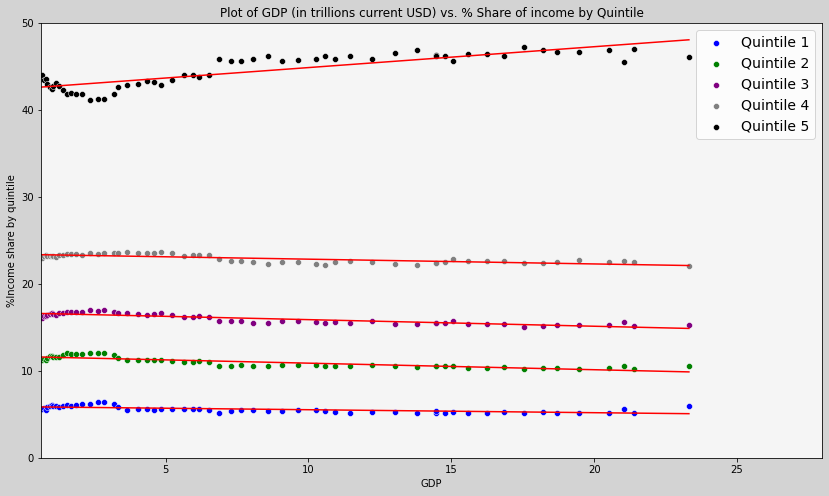

In [45]:
plotter(us_tril_df, dgp_quint_cols)

In [46]:
germany_gdp_quint_df = dfer(econ_df,'Germany',dgp_quint_cols)
germany_gdp_df = gdper(germany_gdp_quint_df,'GDP (current US$) [NY.GDP.MKTP.CD]','t')

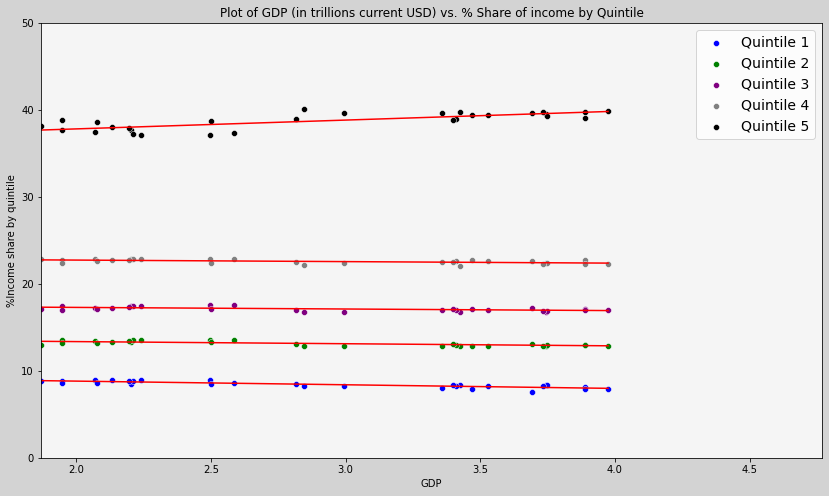

In [48]:
plotter(germany_gdp_df, dgp_quint_cols)